# BOUN IE582 - HW1  Yiğit Kutlu

## TASKS
The aim of the first homework is to get you familiar with data manipulation. It involves certain descriptive analyses to understand the data. Please use English Premier League data of Season 2020/2021, Season 2019/2020 and Season 2018/2019 for the following tasks:

In [232]:
#Reading the data
EPStats1819 <- read.csv(file = 'EP-2018-2019.csv')
EPStats1920 <- read.csv(file = 'EP-2019-2020.csv')
EPStats2021 <- read.csv(file = 'EP-2020-2021.csv')

EPStats1920 <- EPStats1920[-c(3)] # 2018-2019 season does not have the "Time" data so removed it.
EPStats2021 <- EPStats2021[-c(3)]
EPStats1819 <- EPStats1819[1:41]  # Some differences after column 41, we have enough info in first 41 column so just took them. 
EPStats1920 <- EPStats1920[1:41]
EPStats2021 <- EPStats2021[1:41]
EPStats <- rbind(EPStats1819,EPStats1920,EPStats2021) # Merged 3 seasons

## Task 1
There two related subtasks:

###  Task 1.1. 

Plot the following histogram diagrams

    a. Home Score(goals)
    
    b. Away Score(goals)
    
    c. Home Score(goals)– Away Score(goals)


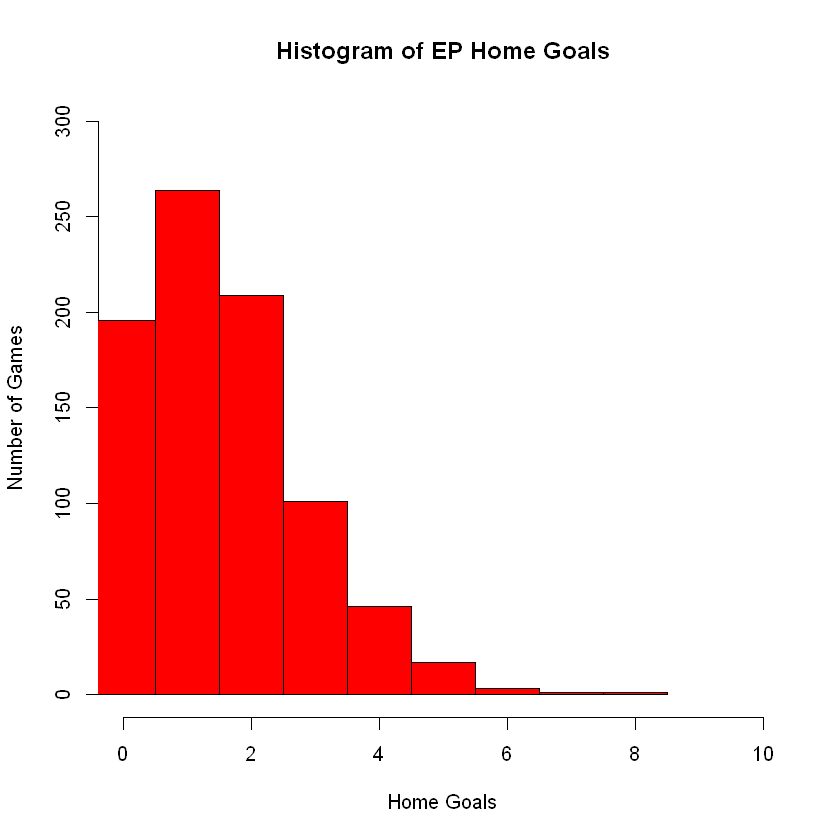

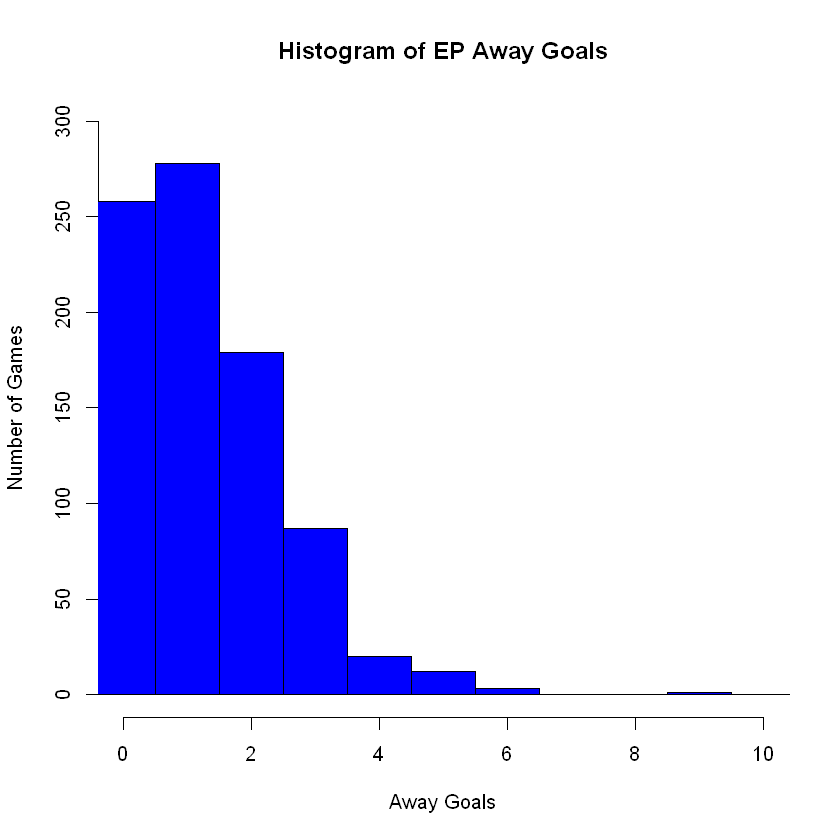

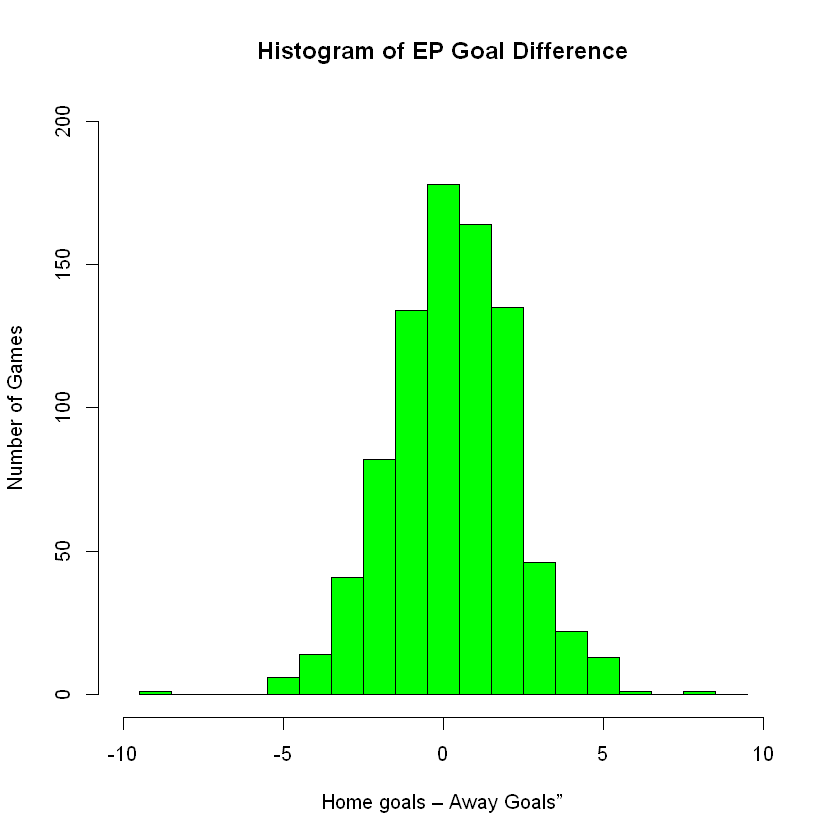

In [233]:
hist(EPStats$FTHG, ylim = c(0, 300),xlim = c(0, 10),main = 'Histogram of EP Home Goals', xlab = 'Home Goals',ylab = 'Number of Games',breaks=seq(-0.5,8.5,by=1), col="red")
hist(EPStats$FTAG, ylim = c(0, 300),xlim = c(0, 10),main = 'Histogram of EP Away Goals', xlab = 'Away Goals',ylab = 'Number of Games', breaks=seq(-0.5,10.5,by=1), col="blue")
hist(EPStats$FTHG-EPStats$FTAG, ylim = c(0, 200),xlim = c(-10, 10), main = 'Histogram of EP Goal Difference',xlab = 'Home goals – Away Goals”',ylab = 'Number of Games', breaks=seq(-9.5,9.5,by=1), col="green")

### Task 1.2 

To which probability distribution do home and away goals fitting well? Does the distribution look like Poisson distribution? Calculate the expected number of games corresponding to each quantile (number of goals) with Poisson distribution by using sample means as distribution mean and plot these values on the histogram. Is this consistent with Poisson distribution claim? In other words, compare the actual outcomes with the theoretical distribution on a plot. 


Home goals and away goals looks like poisson distribution whereas, goal difference looks like normal distribution.
We will plot expected goals according to poisson distribution on top of histograms and we will see if they are similar to poisson distribution.


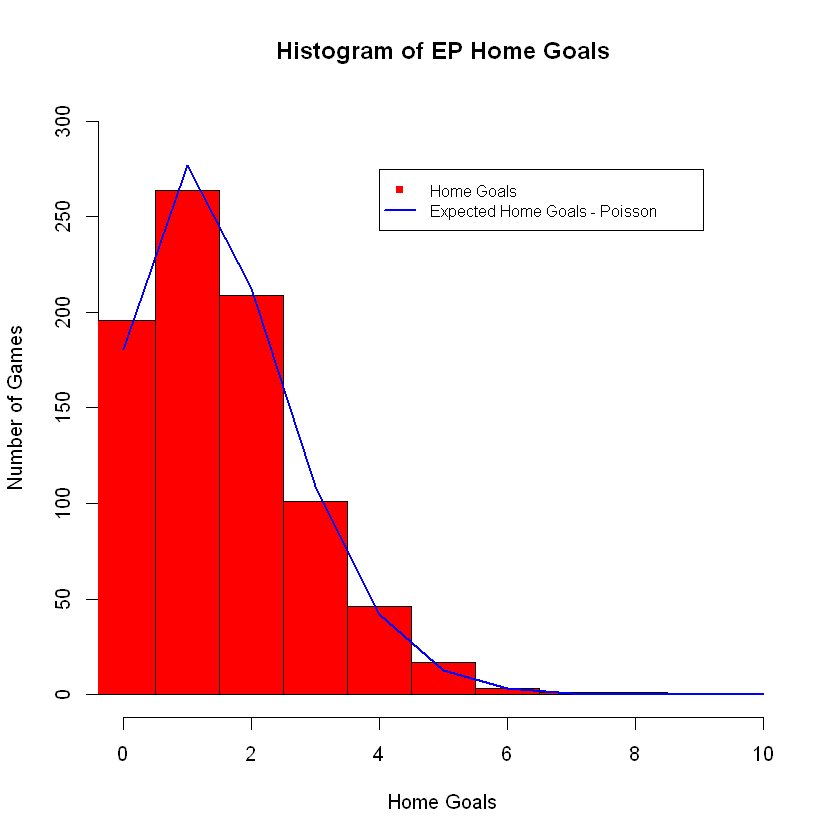

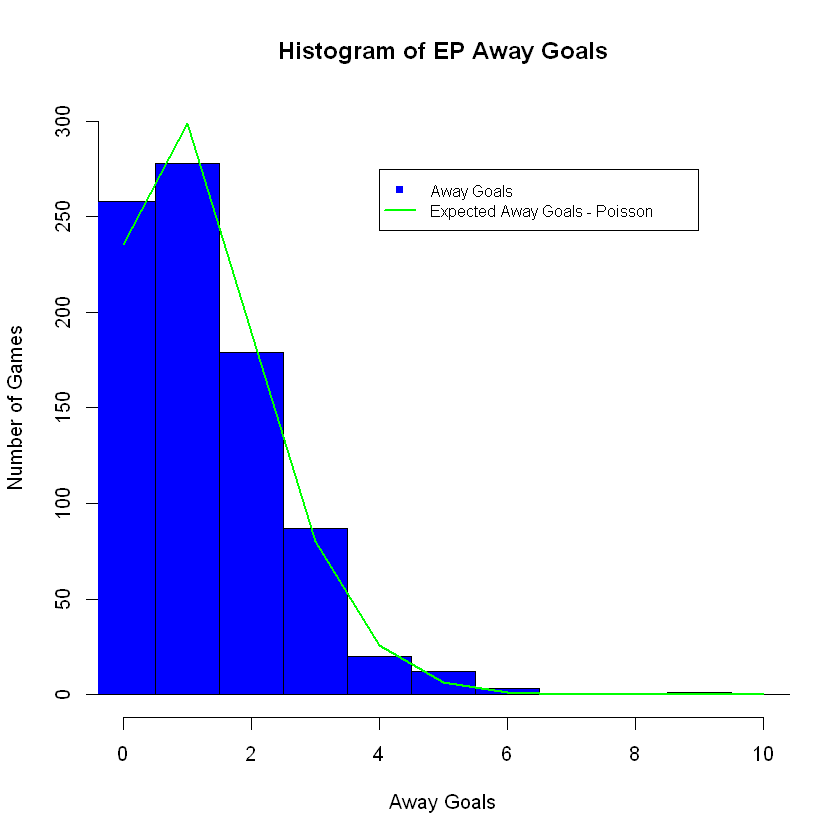

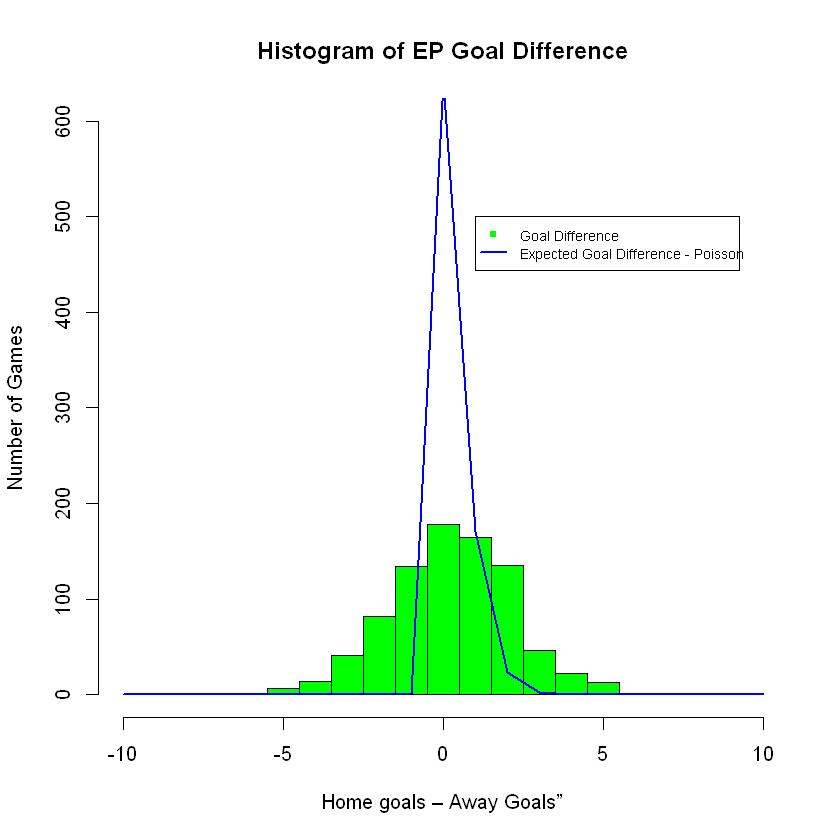

In [234]:
lambda = mean(EPStats$FTHG)
numgames = length(EPStats$FTHG)
ex <- dpois(0:10, lambda)
expectedHG <- ex*numgames
hist(EPStats$FTHG, ylim = c(0, 300),xlim = c(0, 10), main = 'Histogram of EP Home Goals', xlab = 'Home Goals',ylab = 'Number of Games',breaks=seq(-0.5,8.5,by=1), col="red")
lines(0:10,expectedHG,col = 'blue', type = "l" , lwd=2, pch=3)
legend(4, 275, legend=c("Home Goals", "Expected Home Goals - Poisson"),
col=c("red", "blue"), lty=c(0,1), lwd = c(2,2), pch = c(15,-1), cex=0.8)

lambda2 = mean(EPStats$FTAG)
numgames2 = length(EPStats$FTAG)
ex2 <- dpois(0:10, lambda2)
expectedAG <- ex2*numgames
hist(EPStats$FTAG, ylim = c(0, 300),xlim = c(0, 10),main = 'Histogram of EP Away Goals', xlab = 'Away Goals',ylab = 'Number of Games', breaks=seq(-0.5,10.5,by=1), col="blue")
lines(0:10,expectedAG,col = 'green', type = "l" , lwd=2, pch=3)
legend(4, 275, legend=c("Away Goals", "Expected Away Goals - Poisson"),
col=c("blue", "green"), lty=c(0,1), lwd = c(2,2), pch = c(15,-1), cex=0.8)

lambda3 = mean(EPStats$FTHG-EPStats$FTAG)
numgames3 = length(EPStats$FTAG)
ex3 <- dpois(-10:10, lambda3)
expectedGD <- ex3*numgames
hist(EPStats$FTHG-EPStats$FTAG, ylim = c(0, 600),xlim = c(-10, 10), main = 'Histogram of EP Goal Difference',xlab = 'Home goals – Away Goals”',ylab = 'Number of Games', breaks=seq(-9.5,9.5,by=1), col="green")
lines(-10:10,expectedGD,col = 'blue', type = "l" , lwd=2, pch=3)
legend(1, 500, legend=c("Goal Difference", "Expected Goal Difference - Poisson"),
col=c("green", "blue"), lty=c(0,1), lwd = c(2,2), pch = c(15,-1), cex=0.7)

#### Comments on Poisson Distribution
As seen, Home Goals and Away Goals are displaying a fine relation with the poisson distribution. Expected goals obtained 
with the poisson distribution are almost equal to the actual results for Home and Away Goals. However, the goal difference can not be obtained with the poisson distribution, poisson distribution suggest that almost every game (more than 600) should end as a draw. "Normal distribution" will be a better fit for Home Goal - Away Goal (Goal Difference). 

## Task 2
The aim of this task is to understand if bookmakers are good enough in setting their odds for “draw” bets. An empirical evidence for the probability of “draw” can be calculated by determining the certain probability intervals on the implied probabilities by the bookmakers for the specific result. Once you determine a probability range (i.e. a bookmaker’s implied draw probability is 0.4 for a specific game and your probability range is 0.38 and 0.42), you can count the games that finished as draw within this range. In other words, we can discretize probability of draw values into bins (i.e. (0.00,0.05], (0.05, 0.10], …, (0.95,1.00]) and calculate the number of games ended as “draw” in the corresponding bin. Dividing this value by the total number of games in the corresponding bin will provide the estimated probability of “draws”. Please note that implied probabilities may not be larger than a certain value (since it is not reasonable), modify your bins accordingly if this is the case. Aforementioned bins are provided for illustration purposes. If bookmakers are good enough in determining odds (in other words, if they make money), what you expect to see is that fraction of games finished as “draw" is between this implied probability range. Select at least 4 bookmakers for this task.

1. Calculate the P(home win), P(tie) and P(away win) by P(x) = 1/odd.
2. Then calculate these probabilities again using normalization formula at “Odds and Probabilities” part for each bookmarker.
3. First construct a plot of P(home win) – P(away win) on x-axis and P (tie) on y-axis with first probability calculation; then plot the actual probabilities calculated using the results. 

In other words, we can discretize P(home win) – P(away win) values into bins (i.e. (-1,-0.8], (-0.8, -0.6], …, (0.8,1]) and calculate the number of games ended as “Draw” in the corresponding bin. Dividing this value by the total number of games in the corresponding bin will provide the estimated probability of draws. If this probability (calculated from the sample) is larger than the probability proposed by the bookmaker, one can potentially make money in the long run by betting on “Draw” for the games whose odds reside in the corresponding bin.

4. You will do this for each bookmaker separately (You will construct at least 4 plots in total). Comment on if there is a bias in odds representing the probabilities? Name the x and y axes accordingly. Write the name of bookmaker at the top of each plot.

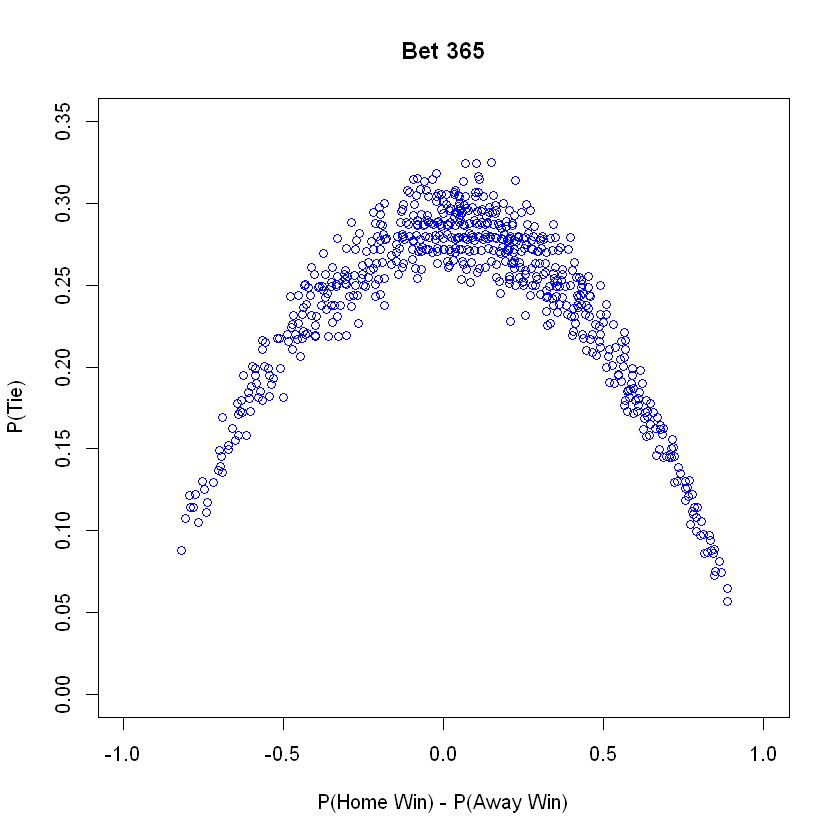

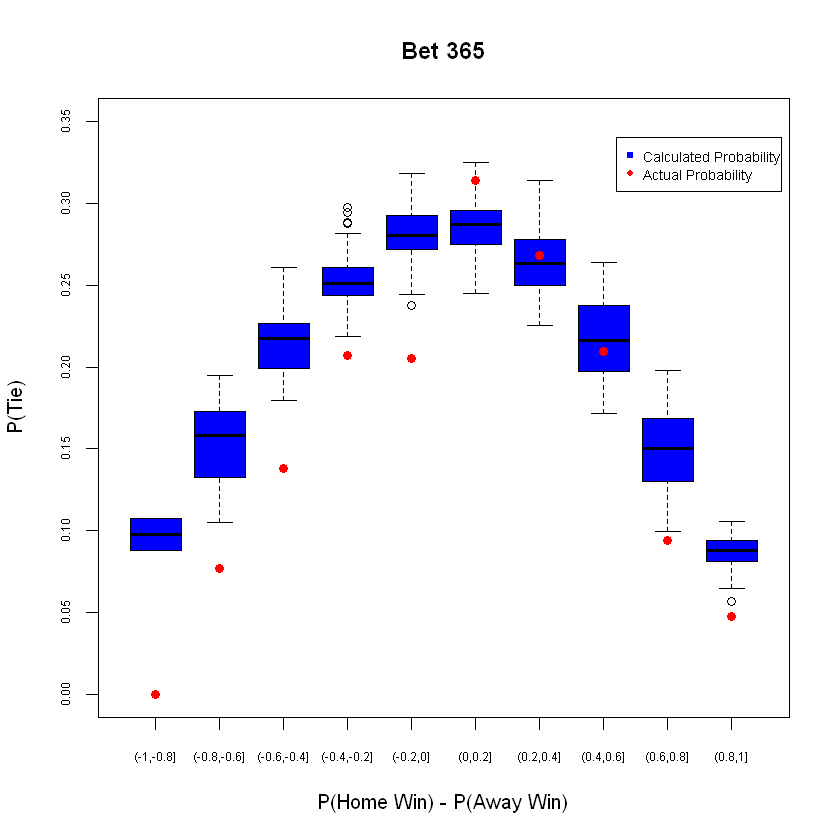

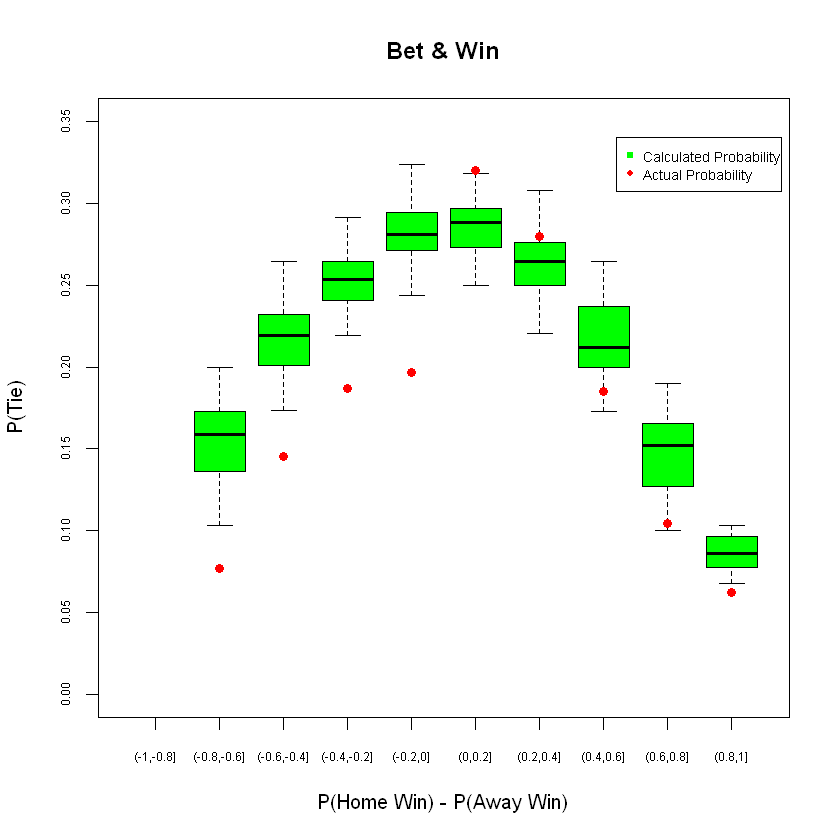

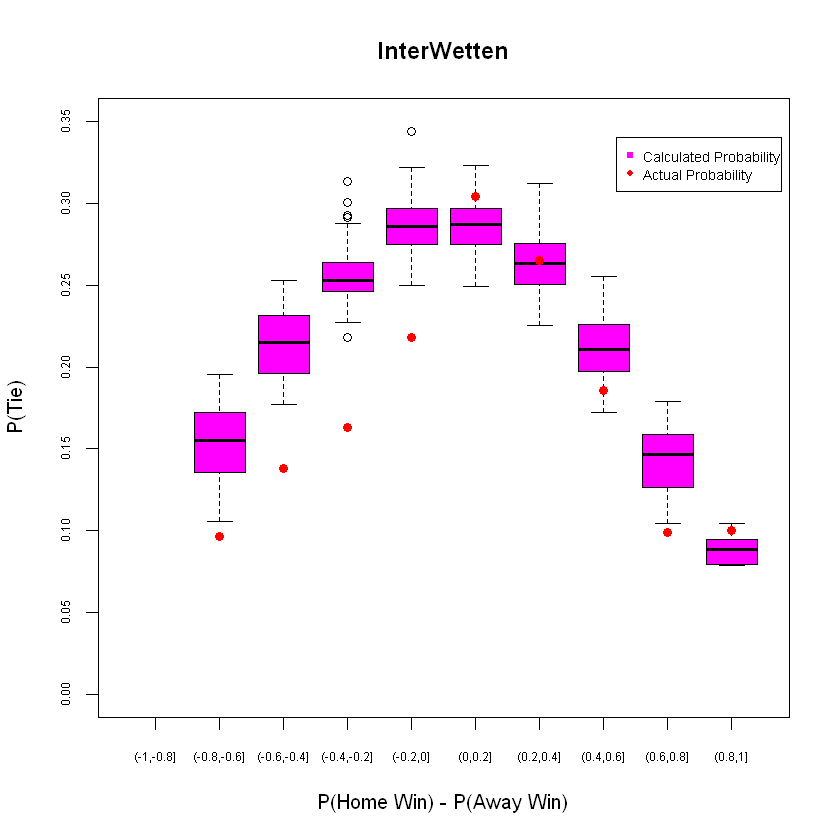

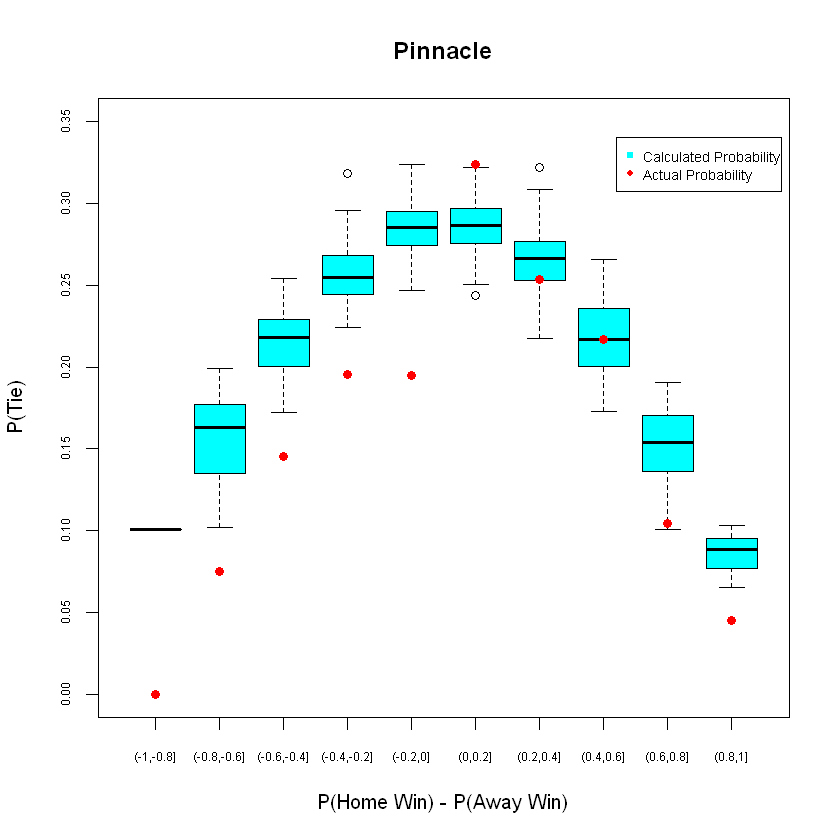

In [235]:
#Reading the Bet data for Bet365
bet365 <- EPStats[24:26]
#Getting the probabilities Task 2-1.
bet365$B365H = 1/bet365$B365H
bet365$B365D = 1/bet365$B365D
bet365$B365A = 1/bet365$B365A
#Normalizing the probabilities Task 2-2.
n = length(bet365$B365H)
for (i in 1:n){
    norma = bet365$B365H[i]+bet365$B365D[i]+bet365$B365A[i]
    bet365$B365H[i]= (bet365$B365H[i]/norma)
    bet365$B365D[i]= (bet365$B365D[i]/norma)
    bet365$B365A[i]= (bet365$B365A[i]/norma)}

bet365$result = EPStats$FTR      #Adding new column for actual game results.
bet365$HA = bet365$B365H-bet365$B365A
#Plot before discretize
plot(bet365$HA,bet365$B365D,ylim = c(0, 0.35),xlim = c(-1, 1), main = 'Bet 365',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="blue")


#Scatter plot is complicated and does not tell much, plotting after discretizing will give meaningful results??

#Discretize the Data P(Home)-P(Away)
bet365$cutHA <- cut(bet365$HA, breaks=seq(-1,1,by=0.2)) #adding new column to specify which group a game belong

#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(bet365$cutHA == '(-1,-0.8]')
countbin11=sum(bet365$cutHA == "(-1,-0.8]" & bet365$result == "D")
act1= countbin11/countbin1
countbin2=sum(bet365$cutHA == '(-0.8,-0.6]')
countbin22=sum(bet365$cutHA == "(-0.8,-0.6]" & bet365$result == "D")
act2= countbin22/countbin2
countbin3=sum(bet365$cutHA == '(-0.6,-0.4]')
countbin33=sum(bet365$cutHA == "(-0.6,-0.4]" & bet365$result == "D")
act3= countbin33/countbin3
countbin4=sum(bet365$cutHA == '(-0.4,-0.2]')
countbin44=sum(bet365$cutHA == "(-0.4,-0.2]" & bet365$result == "D")
act4= countbin44/countbin4
countbin5=sum(bet365$cutHA == '(-0.2,0]')
countbin55=sum(bet365$cutHA == "(-0.2,0]" & bet365$result == "D")
act5= countbin55/countbin5
countbin6=sum(bet365$cutHA == '(0,0.2]')
countbin66=sum(bet365$cutHA == "(0,0.2]" & bet365$result == "D")
act6= countbin66/countbin6
countbin7=sum(bet365$cutHA == '(0.2,0.4]')
countbin77=sum(bet365$cutHA == "(0.2,0.4]" & bet365$result == "D")
act7= countbin77/countbin7
countbin8=sum(bet365$cutHA == '(0.4,0.6]')
countbin88=sum(bet365$cutHA == "(0.4,0.6]" & bet365$result == "D")
act8= countbin88/countbin8
countbin9=sum(bet365$cutHA == '(0.6,0.8]')
countbin99=sum(bet365$cutHA == "(0.6,0.8]" & bet365$result == "D")
act9= countbin99/countbin9
countbin10=sum(bet365$cutHA == '(0.8,1]')
countbin101=sum(bet365$cutHA == "(0.8,1]" & bet365$result == "D")
act10= countbin101/countbin10

#Adding a new column for each groups (bins) actual "tie" probability 
for (i in 1:n){
    if (bet365$cutHA[i] == '(-1,-0.8]'){
        bet365$act[i] = act1
    }
    else if (bet365$cutHA[i] == '(-0.8,-0.6]'){
        bet365$act[i] = act2
    }
    else if (bet365$cutHA[i] == '(-0.6,-0.4]'){
        bet365$act[i] = act3
    }
    else if (bet365$cutHA[i] == '(-0.4,-0.2]'){
        bet365$act[i] = act4
    }
    else if (bet365$cutHA[i] == '(-0.2,0]'){
        bet365$act[i] = act5
    }
    else if (bet365$cutHA[i] == '(0,0.2]'){
        bet365$act[i] = act6
    }
    else if (bet365$cutHA[i] == '(0.2,0.4]'){
        bet365$act[i] = act7
    }
    else if (bet365$cutHA[i] == '(0.4,0.6]'){
        bet365$act[i] = act8
    }
    else if (bet365$cutHA[i] == '(0.6,0.8]'){
        bet365$act[i] = act9
    }
    else if (bet365$cutHA[i] == '(0.8,1]'){
        bet365$act[i] = act10
    }
    }

plot(bet365$cutHA,bet365$B365D,ylim = c(0, 0.35), main = 'Bet 365',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="blue", cex.axis=0.62)
points(bet365$cutHA,bet365$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("blue", "red"), pch = c(15,16), cex=0.7)

#Reading the Bet data for Bet & Win
#Performing same steps done for Bet365
#Reading the Bet data for Bet & Win
BW <- EPStats[27:29]
BW$BWH = 1/BW$BWH
BW$BWD = 1/BW$BWD
BW$BWA = 1/BW$BWA
n = length(BW$BWH)
for (i in 1:n){
    norma = BW$BWH[i]+BW$BWD[i]+BW$BWA[i]
    BW$BWH[i]= (BW$BWH[i]/norma)
    BW$BWD[i]= (BW$BWD[i]/norma)
    BW$BWA[i]= (BW$BWA[i]/norma)}

BW$result = EPStats$FTR     
BW$HA = BW$BWH-BW$BWA
BW$cutHA <- cut(BW$HA, breaks=seq(-1,1,by=0.2))
#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(BW$cutHA == '(-1,-0.8]')
countbin11=sum(BW$cutHA == "(-1,-0.8]" & BW$result == "D")
act1= countbin11/countbin1
countbin2=sum(BW$cutHA == '(-0.8,-0.6]')
countbin22=sum(BW$cutHA == "(-0.8,-0.6]" & BW$result == "D")
act2= countbin22/countbin2
countbin3=sum(BW$cutHA == '(-0.6,-0.4]')
countbin33=sum(BW$cutHA == "(-0.6,-0.4]" & BW$result == "D")
act3= countbin33/countbin3
countbin4=sum(BW$cutHA == '(-0.4,-0.2]')
countbin44=sum(BW$cutHA == "(-0.4,-0.2]" & BW$result == "D")
act4= countbin44/countbin4
countbin5=sum(BW$cutHA == '(-0.2,0]')
countbin55=sum(BW$cutHA == "(-0.2,0]" & BW$result == "D")
act5= countbin55/countbin5
countbin6=sum(BW$cutHA == '(0,0.2]')
countbin66=sum(BW$cutHA == "(0,0.2]" & BW$result == "D")
act6= countbin66/countbin6
countbin7=sum(BW$cutHA == '(0.2,0.4]')
countbin77=sum(BW$cutHA == "(0.2,0.4]" & BW$result == "D")
act7= countbin77/countbin7
countbin8=sum(BW$cutHA == '(0.4,0.6]')
countbin88=sum(BW$cutHA == "(0.4,0.6]" & BW$result == "D")
act8= countbin88/countbin8
countbin9=sum(BW$cutHA == '(0.6,0.8]')
countbin99=sum(BW$cutHA == "(0.6,0.8]" & BW$result == "D")
act9= countbin99/countbin9
countbin10=sum(BW$cutHA == '(0.8,1]')
countbin101=sum(BW$cutHA == "(0.8,1]" & BW$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (BW$cutHA[i] == '(-1,-0.8]'){
        BW$act[i] = act1
    }
    else if (BW$cutHA[i] == '(-0.8,-0.6]'){
        BW$act[i] = act2
    }
    else if (BW$cutHA[i] == '(-0.6,-0.4]'){
        BW$act[i] = act3
    }
    else if (BW$cutHA[i] == '(-0.4,-0.2]'){
        BW$act[i] = act4
    }
    else if (BW$cutHA[i] == '(-0.2,0]'){
        BW$act[i] = act5
    }
    else if (BW$cutHA[i] == '(0,0.2]'){
        BW$act[i] = act6
    }
    else if (BW$cutHA[i] == '(0.2,0.4]'){
        BW$act[i] = act7
    }
    else if (BW$cutHA[i] == '(0.4,0.6]'){
        BW$act[i] = act8
    }
    else if (BW$cutHA[i] == '(0.6,0.8]'){
        BW$act[i] = act9
    }
    else if (BW$cutHA[i] == '(0.8,1]'){
        BW$act[i] = act10
    }
    }

plot(BW$cutHA,BW$BWD,ylim = c(0, 0.35), main = 'Bet & Win',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="green", cex.axis=0.62)
points(BW$cutHA,BW$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("green", "red"), pch = c(15,16), cex=0.7)

#Performing same steps done for Bet365
#Reading the Bet data for InterWetten
IW <- EPStats[30:32]
IW$IWH = 1/IW$IWH
IW$IWD = 1/IW$IWD
IW$IWA = 1/IW$IWA
n = length(IW$IWH)
for (i in 1:n){
    norma = IW$IWH[i]+IW$IWD[i]+IW$IWA[i]
    IW$IWH[i]= (IW$IWH[i]/norma)
    IW$IWD[i]= (IW$IWD[i]/norma)
    IW$IWA[i]= (IW$IWA[i]/norma)}
IW$result = EPStats$FTR     
IW$HA = IW$IWH-IW$IWA
IW$cutHA <- cut(IW$HA, breaks=seq(-1,1,by=0.2)) #adding new column to specify which group a game belong
#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(IW$cutHA == '(-1,-0.8]')
countbin11=sum(IW$cutHA == "(-1,-0.8]" & IW$result == "D")
act1= countbin11/countbin1
countbin2=sum(IW$cutHA == '(-0.8,-0.6]')
countbin22=sum(IW$cutHA == "(-0.8,-0.6]" & IW$result == "D")
act2= countbin22/countbin2
countbin3=sum(IW$cutHA == '(-0.6,-0.4]')
countbin33=sum(IW$cutHA == "(-0.6,-0.4]" & IW$result == "D")
act3= countbin33/countbin3
countbin4=sum(IW$cutHA == '(-0.4,-0.2]')
countbin44=sum(IW$cutHA == "(-0.4,-0.2]" & IW$result == "D")
act4= countbin44/countbin4
countbin5=sum(IW$cutHA == '(-0.2,0]')
countbin55=sum(IW$cutHA == "(-0.2,0]" & IW$result == "D")
act5= countbin55/countbin5
countbin6=sum(IW$cutHA == '(0,0.2]')
countbin66=sum(IW$cutHA == "(0,0.2]" & IW$result == "D")
act6= countbin66/countbin6
countbin7=sum(IW$cutHA == '(0.2,0.4]')
countbin77=sum(IW$cutHA == "(0.2,0.4]" & IW$result == "D")
act7= countbin77/countbin7
countbin8=sum(IW$cutHA == '(0.4,0.6]')
countbin88=sum(IW$cutHA == "(0.4,0.6]" & IW$result == "D")
act8= countbin88/countbin8
countbin9=sum(IW$cutHA == '(0.6,0.8]')
countbin99=sum(IW$cutHA == "(0.6,0.8]" & IW$result == "D")
act9= countbin99/countbin9
countbin10=sum(IW$cutHA == '(0.8,1]')
countbin101=sum(IW$cutHA == "(0.8,1]" & IW$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (IW$cutHA[i] == '(-1,-0.8]'){
        IW$act[i] = act1
    }
    else if (IW$cutHA[i] == '(-0.8,-0.6]'){
        IW$act[i] = act2
    }
    else if (IW$cutHA[i] == '(-0.6,-0.4]'){
        IW$act[i] = act3
    }
    else if (IW$cutHA[i] == '(-0.4,-0.2]'){
        IW$act[i] = act4
    }
    else if (IW$cutHA[i] == '(-0.2,0]'){
        IW$act[i] = act5
    }
    else if (IW$cutHA[i] == '(0,0.2]'){
        IW$act[i] = act6
    }
    else if (IW$cutHA[i] == '(0.2,0.4]'){
        IW$act[i] = act7
    }
    else if (IW$cutHA[i] == '(0.4,0.6]'){
        IW$act[i] = act8
    }
    else if (IW$cutHA[i] == '(0.6,0.8]'){
        IW$act[i] = act9
    }
    else if (IW$cutHA[i] == '(0.8,1]'){
        IW$act[i] = act10
    }
    }

plot(IW$cutHA,IW$IWD,ylim = c(0, 0.35), main = 'InterWetten',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="magenta", cex.axis=0.62)
points(IW$cutHA,IW$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("magenta", "red"), pch = c(15,16), cex=0.7)

#Performing same steps done for Bet365
#Reading the Bet data for Pinnacle
PS <- EPStats[33:35]
PS$PSH = 1/PS$PSH
PS$PSD = 1/PS$PSD
PS$PSA = 1/PS$PSA
n = length(PS$PSH)
for (i in 1:n){
    norma = PS$PSH[i]+PS$PSD[i]+PS$PSA[i]
    PS$PSH[i]= (PS$PSH[i]/norma)
    PS$PSD[i]= (PS$PSD[i]/norma)
    PS$PSA[i]= (PS$PSA[i]/norma)}
PS$result = EPStats$FTR  
PS$HA = PS$PSH-PS$PSA
PS$cutHA <- cut(PS$HA, breaks=seq(-1,1,by=0.2))
#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(PS$cutHA == '(-1,-0.8]')
countbin11=sum(PS$cutHA == "(-1,-0.8]" & PS$result == "D")
act1= countbin11/countbin1
countbin2=sum(PS$cutHA == '(-0.8,-0.6]')
countbin22=sum(PS$cutHA == "(-0.8,-0.6]" & PS$result == "D")
act2= countbin22/countbin2
countbin3=sum(PS$cutHA == '(-0.6,-0.4]')
countbin33=sum(PS$cutHA == "(-0.6,-0.4]" & PS$result == "D")
act3= countbin33/countbin3
countbin4=sum(PS$cutHA == '(-0.4,-0.2]')
countbin44=sum(PS$cutHA == "(-0.4,-0.2]" & PS$result == "D")
act4= countbin44/countbin4
countbin5=sum(PS$cutHA == '(-0.2,0]')
countbin55=sum(PS$cutHA == "(-0.2,0]" & PS$result == "D")
act5= countbin55/countbin5
countbin6=sum(PS$cutHA == '(0,0.2]')
countbin66=sum(PS$cutHA == "(0,0.2]" & PS$result == "D")
act6= countbin66/countbin6
countbin7=sum(PS$cutHA == '(0.2,0.4]')
countbin77=sum(PS$cutHA == "(0.2,0.4]" & PS$result == "D")
act7= countbin77/countbin7
countbin8=sum(PS$cutHA == '(0.4,0.6]')
countbin88=sum(PS$cutHA == "(0.4,0.6]" & PS$result == "D")
act8= countbin88/countbin8
countbin9=sum(PS$cutHA == '(0.6,0.8]')
countbin99=sum(PS$cutHA == "(0.6,0.8]" & PS$result == "D")
act9= countbin99/countbin9
countbin10=sum(PS$cutHA == '(0.8,1]')
countbin101=sum(PS$cutHA == "(0.8,1]" & PS$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (PS$cutHA[i] == '(-1,-0.8]'){
        PS$act[i] = act1
    }
    else if (PS$cutHA[i] == '(-0.8,-0.6]'){
        PS$act[i] = act2
    }
    else if (PS$cutHA[i] == '(-0.6,-0.4]'){
        PS$act[i] = act3
    }
    else if (PS$cutHA[i] == '(-0.4,-0.2]'){
        PS$act[i] = act4
    }
    else if (PS$cutHA[i] == '(-0.2,0]'){
        PS$act[i] = act5
    }
    else if (PS$cutHA[i] == '(0,0.2]'){
        PS$act[i] = act6
    }
    else if (PS$cutHA[i] == '(0.2,0.4]'){
        PS$act[i] = act7
    }
    else if (PS$cutHA[i] == '(0.4,0.6]'){
        PS$act[i] = act8
    }
    else if (PS$cutHA[i] == '(0.6,0.8]'){
        PS$act[i] = act9
    }
    else if (PS$cutHA[i] == '(0.8,1]'){
        PS$act[i] = act10
    }
    }

plot(PS$cutHA,PS$PSD,ylim = c(0, 0.35), main = 'Pinnacle',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="cyan", cex.axis=0.62)
points(PS$cutHA,PS$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("cyan", "red"), pch = c(15,16), cex=0.7)

###### Comments on Task-2
When we observe the plots for each bookmaker, only for the (0,0.2) range for P(Win)-P(Away) betting on "Draw" may be profitable. The actual "draw" probability on that range (0,0.2) is above the probability calculated from the odds given by the bookmakers. For the away team favoured games (P(Win)-P(Away) < 0) and also high margin home team favourite games (P(Win)-P(Away) > 0.6) , the actual probability of game ending as "draw" is way bellow from the probabilities calculated from the odds given by the bookmakers. The odds given in low margin home team favourite games (0 < P(Win)-P(Away) < 0.4 ) observed to allign well with the actual probabilities calculated from previous games.

The only reasonable P(Win)-P(Away) range is obserbed to be (0,0.2) range for one to potentially make money in the long run by betting on “Draw”.

For other P(Win)-P(Away) ranges, bookmakers are good enough in determining odds for "Draw" games. As a rule of thumb "the house always wins".

More narrower bins (smaller than 0.2) may give better results.

## Task 3

There can be some events during the matches that create noise in the outcomes. To be more specific, let’s consider a specific case. Bookings can affect the game result. A red card in the first few minutes of a game can change the outcome of the match drastically. Playing with few players is always a disadvantage for the teams.Perform third and fourth subtask of Task 2 again after removing the matches fitting well to the case above. Is there any significant change in the observations you have for Task 2? Comment on the results.

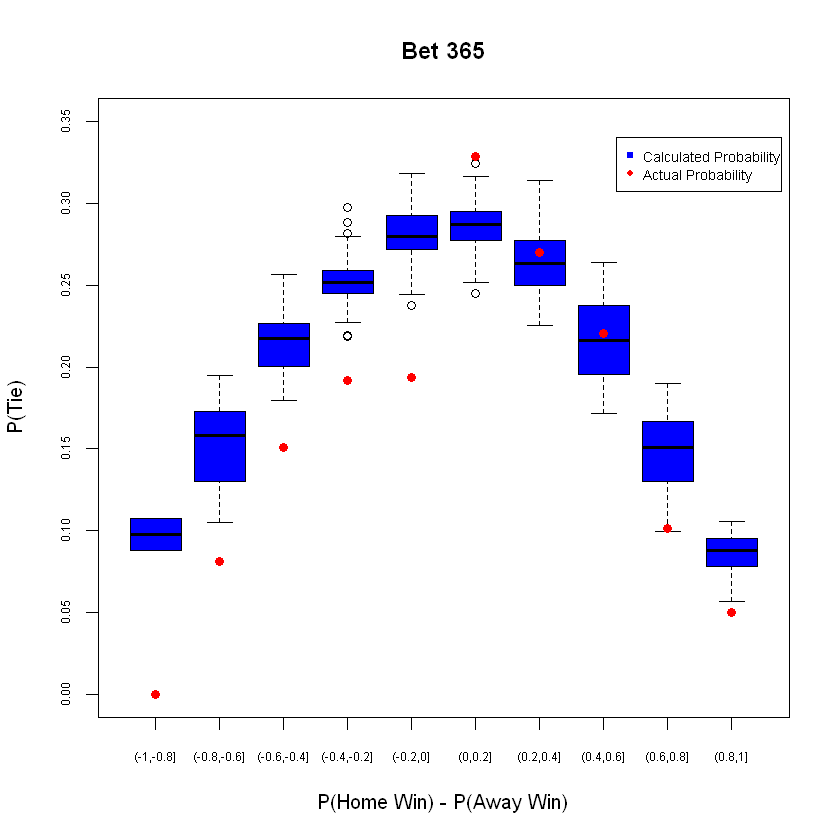

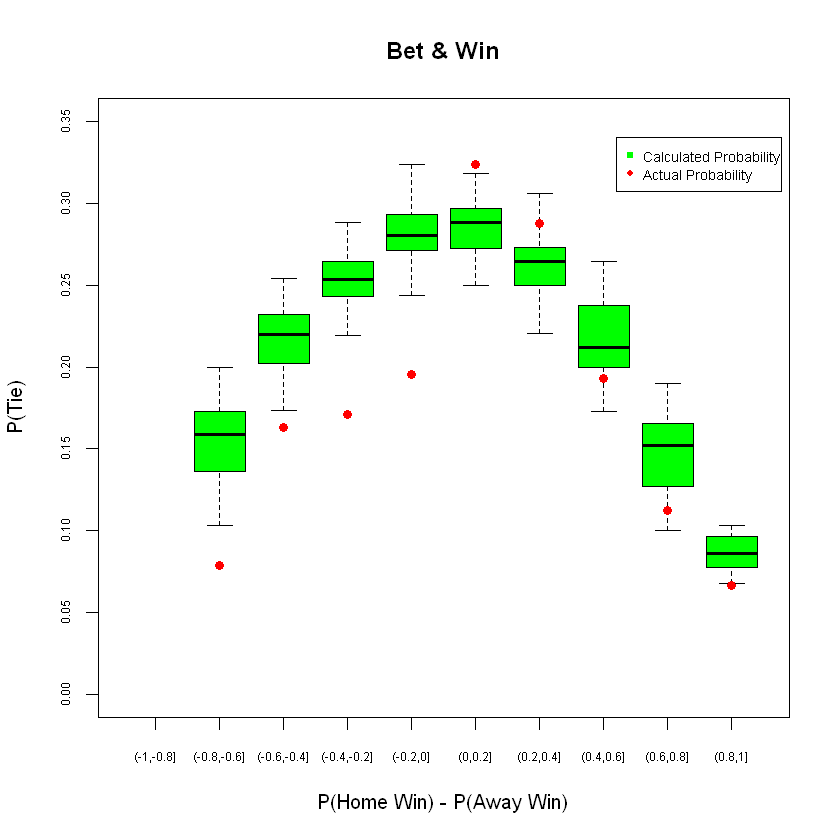

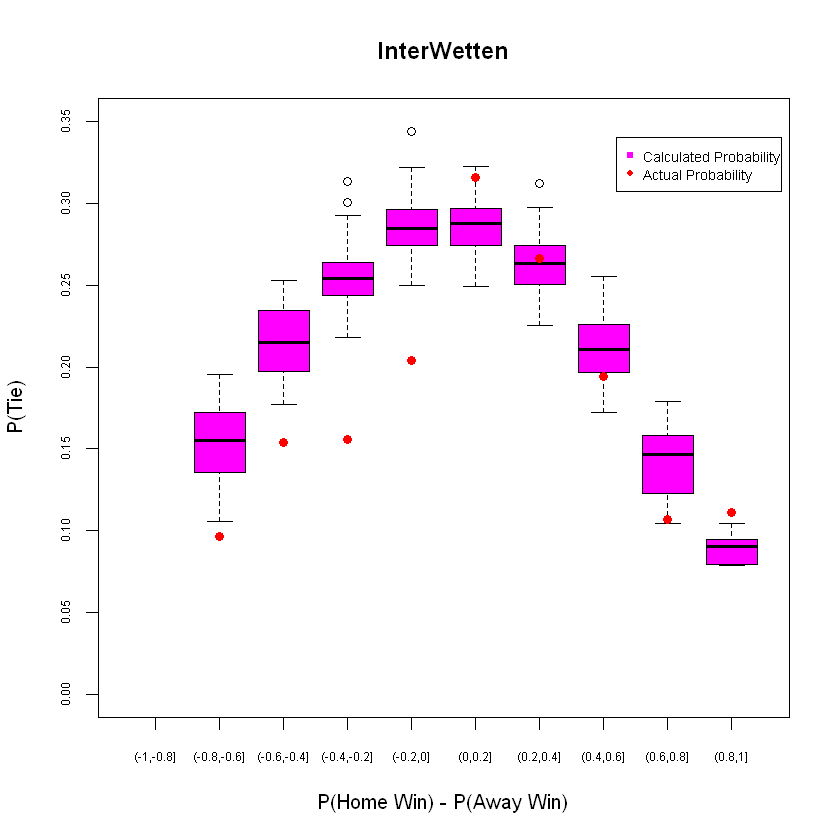

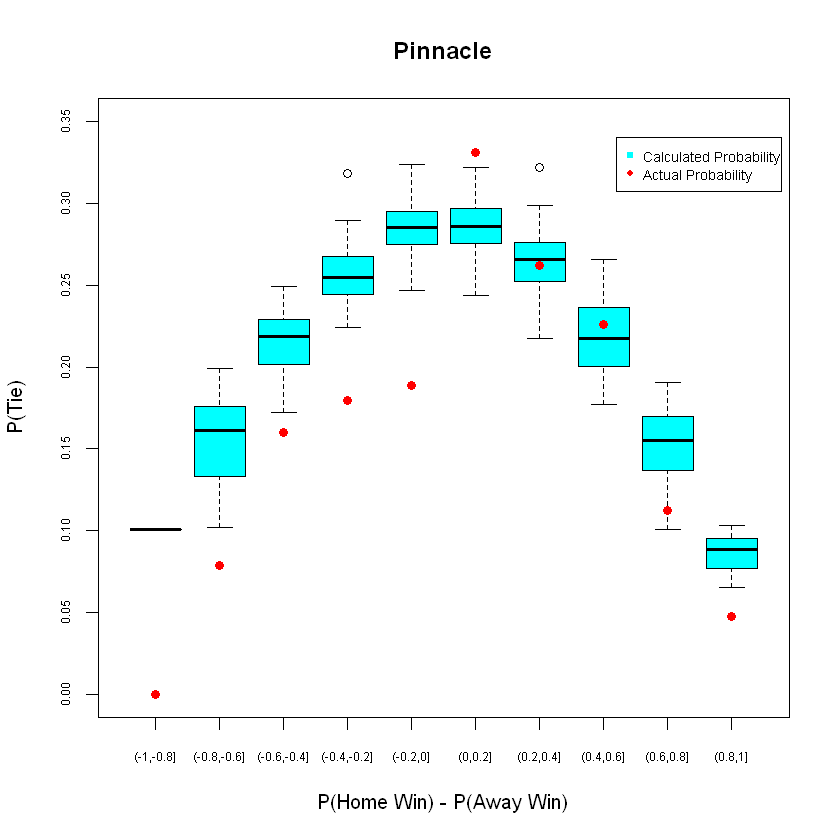

In [236]:
# Add Red Card Data to Bet Datas & Remove Games with Red Card
bet365$HR = EPStats$HR
bet365$AR = EPStats$AR
bet365 <- subset(bet365, bet365$HR==0 & bet365$AR==0)
BW$HR = EPStats$HR
BW$AR = EPStats$AR
BW <- subset(BW, BW$HR==0 & BW$AR==0)
IW$HR = EPStats$HR
IW$AR = EPStats$AR
IW <- subset(IW, IW$HR==0 & IW$AR==0)
PS$HR = EPStats$HR
PS$AR = EPStats$AR
PS <- subset(PS, PS$HR==0 & PS$AR==0)
n = length(bet365$B365H)

#Perform each step on Task-2 again
#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(bet365$cutHA == '(-1,-0.8]')
countbin11=sum(bet365$cutHA == "(-1,-0.8]" & bet365$result == "D")
act1= countbin11/countbin1
countbin2=sum(bet365$cutHA == '(-0.8,-0.6]')
countbin22=sum(bet365$cutHA == "(-0.8,-0.6]" & bet365$result == "D")
act2= countbin22/countbin2
countbin3=sum(bet365$cutHA == '(-0.6,-0.4]')
countbin33=sum(bet365$cutHA == "(-0.6,-0.4]" & bet365$result == "D")
act3= countbin33/countbin3
countbin4=sum(bet365$cutHA == '(-0.4,-0.2]')
countbin44=sum(bet365$cutHA == "(-0.4,-0.2]" & bet365$result == "D")
act4= countbin44/countbin4
countbin5=sum(bet365$cutHA == '(-0.2,0]')
countbin55=sum(bet365$cutHA == "(-0.2,0]" & bet365$result == "D")
act5= countbin55/countbin5
countbin6=sum(bet365$cutHA == '(0,0.2]')
countbin66=sum(bet365$cutHA == "(0,0.2]" & bet365$result == "D")
act6= countbin66/countbin6
countbin7=sum(bet365$cutHA == '(0.2,0.4]')
countbin77=sum(bet365$cutHA == "(0.2,0.4]" & bet365$result == "D")
act7= countbin77/countbin7
countbin8=sum(bet365$cutHA == '(0.4,0.6]')
countbin88=sum(bet365$cutHA == "(0.4,0.6]" & bet365$result == "D")
act8= countbin88/countbin8
countbin9=sum(bet365$cutHA == '(0.6,0.8]')
countbin99=sum(bet365$cutHA == "(0.6,0.8]" & bet365$result == "D")
act9= countbin99/countbin9
countbin10=sum(bet365$cutHA == '(0.8,1]')
countbin101=sum(bet365$cutHA == "(0.8,1]" & bet365$result == "D")
act10= countbin101/countbin10
#Adding a new column for each groups (bins) actual "tie" probability 
for (i in 1:n){
    if (bet365$cutHA[i] == '(-1,-0.8]'){
        bet365$act[i] = act1
    }
    else if (bet365$cutHA[i] == '(-0.8,-0.6]'){
        bet365$act[i] = act2
    }
    else if (bet365$cutHA[i] == '(-0.6,-0.4]'){
        bet365$act[i] = act3
    }
    else if (bet365$cutHA[i] == '(-0.4,-0.2]'){
        bet365$act[i] = act4
    }
    else if (bet365$cutHA[i] == '(-0.2,0]'){
        bet365$act[i] = act5
    }
    else if (bet365$cutHA[i] == '(0,0.2]'){
        bet365$act[i] = act6
    }
    else if (bet365$cutHA[i] == '(0.2,0.4]'){
        bet365$act[i] = act7
    }
    else if (bet365$cutHA[i] == '(0.4,0.6]'){
        bet365$act[i] = act8
    }
    else if (bet365$cutHA[i] == '(0.6,0.8]'){
        bet365$act[i] = act9
    }
    else if (bet365$cutHA[i] == '(0.8,1]'){
        bet365$act[i] = act10
    }
    }
plot(bet365$cutHA,bet365$B365D,ylim = c(0, 0.35), main = 'Bet 365',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="blue", cex.axis=0.62)
points(bet365$cutHA,bet365$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("blue", "red"), pch = c(15,16), cex=0.7)

#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(BW$cutHA == '(-1,-0.8]')
countbin11=sum(BW$cutHA == "(-1,-0.8]" & BW$result == "D")
act1= countbin11/countbin1
countbin2=sum(BW$cutHA == '(-0.8,-0.6]')
countbin22=sum(BW$cutHA == "(-0.8,-0.6]" & BW$result == "D")
act2= countbin22/countbin2
countbin3=sum(BW$cutHA == '(-0.6,-0.4]')
countbin33=sum(BW$cutHA == "(-0.6,-0.4]" & BW$result == "D")
act3= countbin33/countbin3
countbin4=sum(BW$cutHA == '(-0.4,-0.2]')
countbin44=sum(BW$cutHA == "(-0.4,-0.2]" & BW$result == "D")
act4= countbin44/countbin4
countbin5=sum(BW$cutHA == '(-0.2,0]')
countbin55=sum(BW$cutHA == "(-0.2,0]" & BW$result == "D")
act5= countbin55/countbin5
countbin6=sum(BW$cutHA == '(0,0.2]')
countbin66=sum(BW$cutHA == "(0,0.2]" & BW$result == "D")
act6= countbin66/countbin6
countbin7=sum(BW$cutHA == '(0.2,0.4]')
countbin77=sum(BW$cutHA == "(0.2,0.4]" & BW$result == "D")
act7= countbin77/countbin7
countbin8=sum(BW$cutHA == '(0.4,0.6]')
countbin88=sum(BW$cutHA == "(0.4,0.6]" & BW$result == "D")
act8= countbin88/countbin8
countbin9=sum(BW$cutHA == '(0.6,0.8]')
countbin99=sum(BW$cutHA == "(0.6,0.8]" & BW$result == "D")
act9= countbin99/countbin9
countbin10=sum(BW$cutHA == '(0.8,1]')
countbin101=sum(BW$cutHA == "(0.8,1]" & BW$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (BW$cutHA[i] == '(-1,-0.8]'){
        BW$act[i] = act1
    }
    else if (BW$cutHA[i] == '(-0.8,-0.6]'){
        BW$act[i] = act2
    }
    else if (BW$cutHA[i] == '(-0.6,-0.4]'){
        BW$act[i] = act3
    }
    else if (BW$cutHA[i] == '(-0.4,-0.2]'){
        BW$act[i] = act4
    }
    else if (BW$cutHA[i] == '(-0.2,0]'){
        BW$act[i] = act5
    }
    else if (BW$cutHA[i] == '(0,0.2]'){
        BW$act[i] = act6
    }
    else if (BW$cutHA[i] == '(0.2,0.4]'){
        BW$act[i] = act7
    }
    else if (BW$cutHA[i] == '(0.4,0.6]'){
        BW$act[i] = act8
    }
    else if (BW$cutHA[i] == '(0.6,0.8]'){
        BW$act[i] = act9
    }
    else if (BW$cutHA[i] == '(0.8,1]'){
        BW$act[i] = act10
    }
    }

plot(BW$cutHA,BW$BWD,ylim = c(0, 0.35), main = 'Bet & Win',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="green", cex.axis=0.62)
points(BW$cutHA,BW$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("green", "red"), pch = c(15,16), cex=0.7)

#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(IW$cutHA == '(-1,-0.8]')
countbin11=sum(IW$cutHA == "(-1,-0.8]" & IW$result == "D")
act1= countbin11/countbin1
countbin2=sum(IW$cutHA == '(-0.8,-0.6]')
countbin22=sum(IW$cutHA == "(-0.8,-0.6]" & IW$result == "D")
act2= countbin22/countbin2
countbin3=sum(IW$cutHA == '(-0.6,-0.4]')
countbin33=sum(IW$cutHA == "(-0.6,-0.4]" & IW$result == "D")
act3= countbin33/countbin3
countbin4=sum(IW$cutHA == '(-0.4,-0.2]')
countbin44=sum(IW$cutHA == "(-0.4,-0.2]" & IW$result == "D")
act4= countbin44/countbin4
countbin5=sum(IW$cutHA == '(-0.2,0]')
countbin55=sum(IW$cutHA == "(-0.2,0]" & IW$result == "D")
act5= countbin55/countbin5
countbin6=sum(IW$cutHA == '(0,0.2]')
countbin66=sum(IW$cutHA == "(0,0.2]" & IW$result == "D")
act6= countbin66/countbin6
countbin7=sum(IW$cutHA == '(0.2,0.4]')
countbin77=sum(IW$cutHA == "(0.2,0.4]" & IW$result == "D")
act7= countbin77/countbin7
countbin8=sum(IW$cutHA == '(0.4,0.6]')
countbin88=sum(IW$cutHA == "(0.4,0.6]" & IW$result == "D")
act8= countbin88/countbin8
countbin9=sum(IW$cutHA == '(0.6,0.8]')
countbin99=sum(IW$cutHA == "(0.6,0.8]" & IW$result == "D")
act9= countbin99/countbin9
countbin10=sum(IW$cutHA == '(0.8,1]')
countbin101=sum(IW$cutHA == "(0.8,1]" & IW$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (IW$cutHA[i] == '(-1,-0.8]'){
        IW$act[i] = act1
    }
    else if (IW$cutHA[i] == '(-0.8,-0.6]'){
        IW$act[i] = act2
    }
    else if (IW$cutHA[i] == '(-0.6,-0.4]'){
        IW$act[i] = act3
    }
    else if (IW$cutHA[i] == '(-0.4,-0.2]'){
        IW$act[i] = act4
    }
    else if (IW$cutHA[i] == '(-0.2,0]'){
        IW$act[i] = act5
    }
    else if (IW$cutHA[i] == '(0,0.2]'){
        IW$act[i] = act6
    }
    else if (IW$cutHA[i] == '(0.2,0.4]'){
        IW$act[i] = act7
    }
    else if (IW$cutHA[i] == '(0.4,0.6]'){
        IW$act[i] = act8
    }
    else if (IW$cutHA[i] == '(0.6,0.8]'){
        IW$act[i] = act9
    }
    else if (IW$cutHA[i] == '(0.8,1]'){
        IW$act[i] = act10
    }
    }

plot(IW$cutHA,IW$IWD,ylim = c(0, 0.35), main = 'InterWetten',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="magenta", cex.axis=0.62)
points(IW$cutHA,IW$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("magenta", "red"), pch = c(15,16), cex=0.7)

#Actual "tie" Probability Calculation for each group(bin)
countbin1=sum(PS$cutHA == '(-1,-0.8]')
countbin11=sum(PS$cutHA == "(-1,-0.8]" & PS$result == "D")
act1= countbin11/countbin1
countbin2=sum(PS$cutHA == '(-0.8,-0.6]')
countbin22=sum(PS$cutHA == "(-0.8,-0.6]" & PS$result == "D")
act2= countbin22/countbin2
countbin3=sum(PS$cutHA == '(-0.6,-0.4]')
countbin33=sum(PS$cutHA == "(-0.6,-0.4]" & PS$result == "D")
act3= countbin33/countbin3
countbin4=sum(PS$cutHA == '(-0.4,-0.2]')
countbin44=sum(PS$cutHA == "(-0.4,-0.2]" & PS$result == "D")
act4= countbin44/countbin4
countbin5=sum(PS$cutHA == '(-0.2,0]')
countbin55=sum(PS$cutHA == "(-0.2,0]" & PS$result == "D")
act5= countbin55/countbin5
countbin6=sum(PS$cutHA == '(0,0.2]')
countbin66=sum(PS$cutHA == "(0,0.2]" & PS$result == "D")
act6= countbin66/countbin6
countbin7=sum(PS$cutHA == '(0.2,0.4]')
countbin77=sum(PS$cutHA == "(0.2,0.4]" & PS$result == "D")
act7= countbin77/countbin7
countbin8=sum(PS$cutHA == '(0.4,0.6]')
countbin88=sum(PS$cutHA == "(0.4,0.6]" & PS$result == "D")
act8= countbin88/countbin8
countbin9=sum(PS$cutHA == '(0.6,0.8]')
countbin99=sum(PS$cutHA == "(0.6,0.8]" & PS$result == "D")
act9= countbin99/countbin9
countbin10=sum(PS$cutHA == '(0.8,1]')
countbin101=sum(PS$cutHA == "(0.8,1]" & PS$result == "D")
act10= countbin101/countbin10
for (i in 1:n){
    if (PS$cutHA[i] == '(-1,-0.8]'){
        PS$act[i] = act1
    }
    else if (PS$cutHA[i] == '(-0.8,-0.6]'){
        PS$act[i] = act2
    }
    else if (PS$cutHA[i] == '(-0.6,-0.4]'){
        PS$act[i] = act3
    }
    else if (PS$cutHA[i] == '(-0.4,-0.2]'){
        PS$act[i] = act4
    }
    else if (PS$cutHA[i] == '(-0.2,0]'){
        PS$act[i] = act5
    }
    else if (PS$cutHA[i] == '(0,0.2]'){
        PS$act[i] = act6
    }
    else if (PS$cutHA[i] == '(0.2,0.4]'){
        PS$act[i] = act7
    }
    else if (PS$cutHA[i] == '(0.4,0.6]'){
        PS$act[i] = act8
    }
    else if (PS$cutHA[i] == '(0.6,0.8]'){
        PS$act[i] = act9
    }
    else if (PS$cutHA[i] == '(0.8,1]'){
        PS$act[i] = act10
    }
    }

plot(PS$cutHA,PS$PSD,ylim = c(0, 0.35), main = 'Pinnacle',xlab = 'P(Home Win) - P(Away Win)',ylab = 'P(Tie)', col="cyan", cex.axis=0.62)
points(PS$cutHA,PS$act, type = "p", col='red',pch = 16)
legend(8.2, 0.34, legend=c("Calculated Probability", "Actual Probability"),
col=c("cyan", "red"), pch = c(15,16), cex=0.7)

###### Coments on Task3

Removed the games in which at least one red card occured. The results showed a higher confidence level for the (0,0.2) range of P(Win)-P(Away). For other P(Win)-P(Away) ranges, the actual probability of games ending as draw observed to be lowered. Execpt (0,0.2) range for P(Win)-P(Away), betting on a "Draw" seems unprofitable. On the other hand, especially when there is no red card in the game, betting on a "Draw" for the games in the (0,0.2) range for P(Win)-P(Away) seems profitable in the long term. 

The bookmakers are giving low odds, high probabilities, for the games than actual probabilities obtained from previous games data except the (0,0.2) range for P(Win)-P(Away). The bookmakers will earn money on "Draw" bets, especially for the games that are not in the (0,0.2) range for P(Win)-P(Away).

All in all, I reccomend betting for "Draw" on the games in the (0,0.2) range for P(Win)-P(Away) but for the other ranges, betting on "Draw" seems unprofitable.